In [10]:
# General Python/ML libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Specific ML models/packages
from tensorflow.keras.models import Model
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay, roc_curve, roc_auc_score

In [2]:
# Authorize access to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
test_dir = r'/content/drive/MyDrive/Colab Notebooks/SkinCheck/binary/test'
densenet169_model_filepath = r'/content/drive/MyDrive/Colab Notebooks/SkinCheck/densenet169' # best model/optimized for classification

In [4]:
CHANNELS = 3
COLOR_MODE = 'rgb'
BATCH_SIZE = 32
DENSENET169_IMG_WIDTH, DENSENET169_IMG_HEIGHT = 224, 224
TARGET_SIZE = (DENSENET169_IMG_WIDTH, DENSENET169_IMG_HEIGHT)
CLASSES = ['benign', 'malignant']

In [7]:
testing_data_gen = ImageDataGenerator(rescale=1./255)

In [8]:
test_gen = testing_data_gen.flow_from_directory(test_dir,
                                                color_mode=COLOR_MODE,
                                                target_size=TARGET_SIZE,
                                                class_mode='binary',
                                                batch_size=BATCH_SIZE,
                                                shuffle=False)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [13]:
diagnosis_model = load_model(densenet169_model_filepath)

In [25]:
def get_metric_report(img_data_generator, preds):
    report = classification_report(y_true=img_data_generator.labels, y_pred=preds)
    print(report)

In [26]:
def plot_confusion_matrix(data_generator, preds):
    cm = confusion_matrix(y_true=data_generator.labels, y_pred=preds)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)

    cm_display.plot(include_values=True,
                    cmap='Blues',
                    xticks_rotation=45,
                    values_format='.5g')

    plt.title('CheckSkin50 Confusion Matrix')
    plt.tick_params(axis=u'both', which=u'both',length=0)

    plt.show()

In [27]:
def plot_precision_recall(data_generator, preds):
    precision, recall, thresholds = precision_recall_curve(y_true=data_generator.labels, probas_pred=preds)
    average_precision = average_precision_score(y_true=data_generator.labels, y_score=preds)
    pr_display = PrecisionRecallDisplay(recall=recall, precision=precision, average_precision=average_precision, estimator_name=None)

    pr_display.plot(name='CheckSkin50')
    plt.title('CheckSkin50 Precision-Recall Curve')

In [30]:
preds = diagnosis_model.predict(test_gen)
rounded_preds = np.around(preds.copy()).astype(int)

21/21 [==============================] - 185s 8s/step


In [31]:
get_metric_report(test_gen, rounded_preds)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       360
           1       0.86      0.86      0.86       300

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



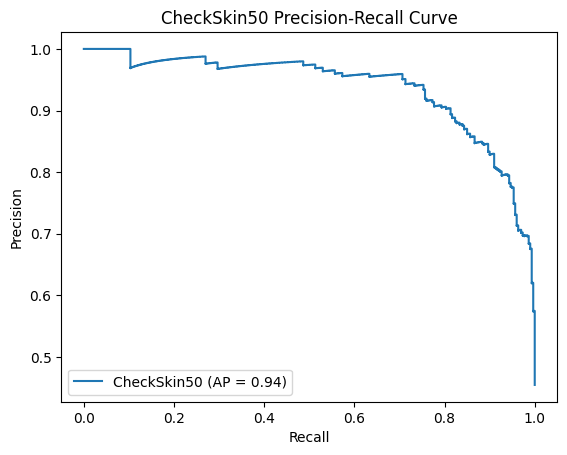

In [32]:
plot_precision_recall(test_gen, preds)

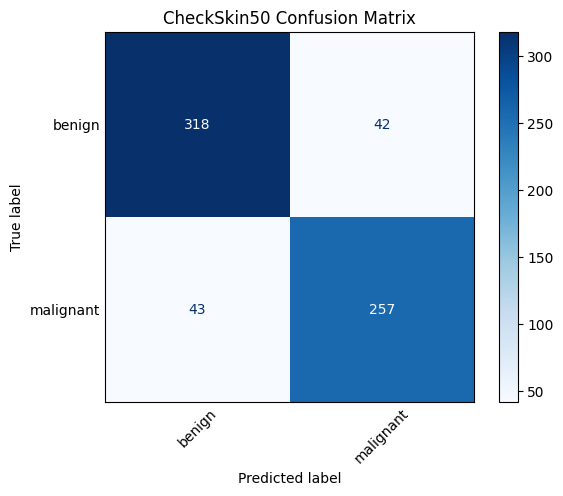

In [33]:
plot_confusion_matrix(test_gen, rounded_preds)